<b><h1><font color = 'blue'> Árvore de Regressão para Preço de Imóveis </font></h1></b>

<h2><b><font color = '#993131'> Objetivo </font></b></h2>

<b>O trabalho tem por objetivo realizar o treinamento de um modelo de Árvore de Regressão para tentar predizer o valor de imóveis a partir de variáveis específicas. O conjunto de dados foi fornecido pela comunidade do Kaggle.</b>

<h2><b><font color = '#993131'> Ferramentas Utilizadas </font></b></h2>

<b> 
<li> Python
<li> Scikit-Learn
<li> Pandas
<li> Seaborn
<li> Matplotlib
</b>

<b><h3><font color = '#316c99'> Modelos de Machine Learning </font></h3></b>

<b><li>Decision Tree Regressor
<li>Random Forests</b>

<b><h3><font color = '#316c99'> Conjunto de dados </font></h3></b>

<b>O conjunto de dados é referente a imóveis localizados na Austrália. Nesses dados, estão registros de imóveis, com várias informações relevantes, desde localização, por endereço e por latitude e longitude, preço do imóvel, tipo da moradia, data de construção, quantidade de banheiros, quartos e cômodos, extensão do imóvel, entre outras informações.</b>

<b><h3><font color = '#316c99'> Visualização dos dados </font></h3></b>

In [1]:
#Carregando as bibliotecas que serão utilizadas no trabalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando os dados
dados_houses = pd.read_csv('melb_data.csv')
#Verificando as primeiras 5 linhas
dados_houses.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
#Quantidade de linhas e colunas
dados_houses.shape

(13580, 21)

In [4]:
#Verificando se há valores ausentes e o tipo
dados_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

<b>Como visto anteriormente, a quantidade de linhas, ou seja, de registros nesse conjunto de dados foi igual a 13580. Dessa forma, algumas colunas apresentam valores faltantes e isso pode afetar o desempenho do modelo de machine learning. Como das 20 colunas, apenas 4 apresentaram valores nulos, no entanto, como o modelo proposto tentará prever o preço a partir da localização, utilizando latitude e longitude, número de cômodos, número de quartos, números de banheiros e tamanho do terreno, as 4 colunas que apresentam registros ausentes serão ignoradas. No entanto, para a utilização dessas variáveis para ter um modelo mais descritivo, técnicas estatísticas poderiam ser utilizadas para tentar preencher valores ausentes. Outra forma poderia ser a retirada desses registros por meio do <code>dropna</code> que retira os registros ausentes do conjunto de dados.</b>

In [5]:
#Definindo um dataframe apenas com as colunas que serão utilizadas
colunas_df = ['Rooms','Bedroom2','Bathroom','Landsize','Lattitude','Longtitude','Price']
df_houses = dados_houses[colunas_df]
df_houses.head()

,Rooms,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Price
0,2,2.0,1.0,202.0,-37.7996,144.9984,1480000.0
1,2,2.0,1.0,156.0,-37.8079,144.9934,1035000.0
2,3,3.0,2.0,134.0,-37.8093,144.9944,1465000.0
3,3,3.0,2.0,94.0,-37.7969,144.9969,850000.0
4,4,3.0,1.0,120.0,-37.8072,144.9941,1600000.0


In [6]:
#Realizando o resumo estatístico para as variáveis
df_houses.describe().drop(df_houses[['Lattitude','Longtitude']],axis=1)

,Rooms,Bedroom2,Bathroom,Landsize,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,1.358000e+04
mean,2.937997,2.914728,1.534242,558.416127,1.075684e+06
std,0.955748,0.965921,0.691712,3990.669241,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,2.000000,1.000000,177.000000,6.500000e+05
50%,3.000000,3.000000,1.000000,440.000000,9.030000e+05
75%,3.000000,3.000000,2.000000,651.000000,1.330000e+06
max,10.000000,20.000000,8.000000,433014.000000,9.000000e+06


In [7]:
print(df_houses['Rooms'].value_counts(), df_houses['Bedroom2'].value_counts(), df_houses['Bathroom'].value_counts())

Rooms
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: count, dtype: int64 Bedroom2
3.0     5896
2.0     3737
4.0     2601
1.0      691
5.0      556
6.0       63
0.0       16
7.0       10
8.0        5
9.0        3
20.0       1
10.0       1
Name: count, dtype: int64 Bathroom
1.0    7512
2.0    4974
3.0     917
4.0     106
0.0      34
5.0      28
6.0       5
7.0       2
8.0       2
Name: count, dtype: int64


<b>Alguns modelos sofrem maiores alterações com outliers, como o valor de 20 quartos para um imóvel parece ser um ponto fora do limite máximo, talvez fosse necessário a exclusão desse dado para treinar o modelo, pois ele aparenta ser um erro nesse conjunto de dados. No entanto, como o modelo que será utilizado será da Árvore de Regressão, a presença de poucos outliers costumam gerar poucas alterações na predição do modelo.</b>

<b>Como boa prática, para garantir que esse registro seria realmente um outlier, o boxplot abaixo poderia expor isso. Como o registro de 20 quartos se encontra muito acima do limite superior máximo e o registro que apresenta 20 quartos, possui 3 cômodos associados, não faria sentido ter 20 quartos, se a quantidade de cômodos é apenas 3.</b>

In [8]:
df_houses.loc[df_houses['Bedroom2'].idxmax()]

Rooms         3.000000e+00
Bedroom2      2.000000e+01
Bathroom      1.000000e+00
Landsize      8.750000e+02
Lattitude    -3.788150e+01
Longtitude    1.450491e+02
Price         1.650000e+06
Name: 7404, dtype: float64

<Axes: >

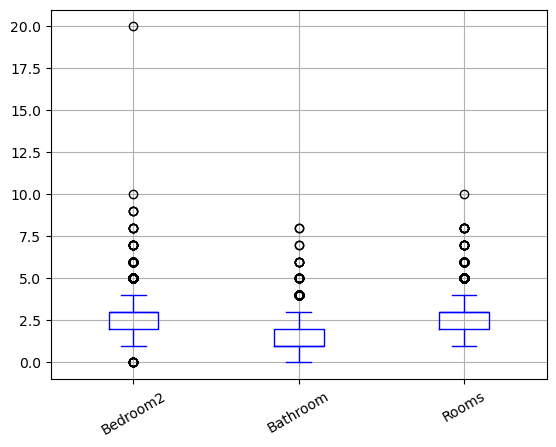

In [9]:
df_houses.boxplot(column=['Bedroom2', 'Bathroom', 'Rooms'], grid='true', color='blue',fontsize=10, rot=30)

<b>Como outros dados, apresentaram-se fora do limite superior e inferior, a variável quartos será excluída do modelo de treinamento, pois pode apresentar vários outros dados que podem gerar respostas erradas nas predições realizadas pelo modelo. Além disso, como não está claro no conjunto de dados se a variável cômodos engloba a quantidade de quartos, talvez considerar as duas possa ser redundante. Como a quantidade de cômodos pode ser uma variável mais abrangente que a variável quartos, opta-se pela retirada dessa última.</b>

In [10]:
#Retirando a coluna quartos do conjunto de dados
df_houses_withoutbed = df_houses.drop('Bedroom2', axis = 1)
df_houses_withoutbed

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Price
0,2,1.0,202.0,-37.79960,144.99840,1480000.0
1,2,1.0,156.0,-37.80790,144.99340,1035000.0
2,3,2.0,134.0,-37.80930,144.99440,1465000.0
3,3,2.0,94.0,-37.79690,144.99690,850000.0
4,4,1.0,120.0,-37.80720,144.99410,1600000.0
...,...,...,...,...,...,...
13575,4,2.0,652.0,-37.90562,145.16761,1245000.0
13576,3,2.0,333.0,-37.85927,144.87904,1031000.0
13577,3,2.0,436.0,-37.85274,144.88738,1170000.0
13578,4,1.0,866.0,-37.85908,144.89299,2500000.0


<h2><b><font color = '#993131'> Treinando o Modelo de Árvore de Regressão </font></b></h2>

<b>O modelo proposto será o de Árvore de Regressão. Esse modelo encontra padrões associando as variáveis a caminhos específicos para cada decisão escolhida para, no final, tentar encontrar um padrão para predizer a variável alvo. Em outras palavras, o modelo divide os dados em vários grupos para cada variável específica. Por exemplo, imóveis com mais de 1 banheiro e móveis com menos de 1 banheiro. Olhando para os imóveis com mais de 1 banheiro, a área do terreno acima de um valor dado, qual seria o valor médio do preço? Com isso, pode-se introduzir novos dados e tentar predizer uma estimativa do valor desses novos imóveis.</b>

<b>Esse modelo é uma boa proposta para o conjunto de dados fornecido, pois a proposta dele é tentar predizer valores numéricos a partir de vários segmentos. Como o conjunto de dados possui várias segmentações para os imóveis, e pretende-se propor o valor do imóvel a partir de características desses segmentos, o modelo de Árvore de Regressão é uma boa forma de tentar predizer a variável alvo. Para isso, será utilizada a biblioteca Scikit-Learn.</b>

In [11]:
#Selecionando a variável alvo
Y = df_houses['Price']

<b>As variáveis que serão utilizadas como preditoras são chamadas de "Features".</b>

In [12]:
#Definindo as Features
features = df_houses[['Rooms','Bathroom','Landsize','Lattitude','Longtitude']]

#Verificando se foram gravadas corretamente
features.head()

#Guardando as Features em uma variável x
X = features

<h3><b><font color = '#316c99'> Definindo Teste e Validação </font></b></h3>

<b>Como possuímos apenas um conjunto de dados, eles devem ser divididos em dados de treino e dados de validação, pois realizar a validação do modelo com os mesmos dados que o modelo foi treinado pode gerar uma falsa aprovação do modelo. Como o modelo foi treinado em um conjunto de dados, ele consegue predizer com uma certa facilidade o que está ali, porém com dados novos, totalmente fora do padrão, ele geraria valores muito incorretos de predição.</b>

In [13]:
#Carregando o modelo de árvore de regressão
from sklearn.tree import DecisionTreeRegressor

#Carregando a função de separar as amostras em treino e validação
from sklearn.model_selection import train_test_split

#Definindo as amostras de teste e validação
treino_X, val_X, treino_Y, val_Y = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Guardando do scikit-learn em uma variável
modelo_arvore = DecisionTreeRegressor(random_state = 42) #random_state é necessário para que o modelo possa ser reproduzido com os mesmos dados em outra ocasião

#Treinando o modelo
modelo_arvore.fit(treino_X,treino_Y)

DecisionTreeRegressor(random_state=42)

<b>Com o modelo treinado, o próximo passo é testar como o modelo se sai tentando predizer valores de preço de imóveis. Para isso, serão utilizadas as amostras de dados de validação geradas anteriormente.</b>

In [14]:
print('Utilizando o modelo para prever as 10 primeiras linhas do conjunto de dados de validação:')
print(X.head(10))
predicoes = modelo_arvore.predict(val_X.head(10))
print(f'\nPredições:{predicoes}')

Utilizando o modelo para prever as 10 primeiras linhas do conjunto de dados de validação:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.9941
5      2       1.0     181.0   -37.8041    144.9953
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
8      1       1.0       0.0   -37.8008    144.9973
9      2       1.0     220.0   -37.8010    144.9989

Predições:[2515000.  792000.  920000.  422500.  850000. 1015000.  370000. 1325000.
  690000. 1460000.]


<b>Avaliando, lado a lado, os valores de imóveis preditos e os valores reais, tem-se:</b>

In [15]:
#Criando um dataframe para comparar as predições e os valores reais
df_comparacao = pd.DataFrame()

#Adicionando os valores de predição e os reais
df_comparacao['Valores Reais'] = val_Y.head(10)
df_comparacao['Predições'] = predicoes

df_comparacao

,Valores Reais,Predições
1061,2600000.0,2515000.0
6482,620000.0,792000.0
8395,1000000.0,920000.0
4659,430000.0,422500.0
7386,392250.0,850000.0
6607,700000.0,1015000.0
8094,439000.0,370000.0
4590,2236000.0,1325000.0
13475,671000.0,690000.0
10318,1870000.0,1460000.0


<b>Superficialmente, o modelo parece prever alguns valores, entretanto outros não. Uma das formas de verificar a qualidade do modelo é por meio da utilização do erro médio. Esse erro é a média de todos os erros associados às tentativas de predição.</b>

In [16]:
#Importando o pacote para calcular o erro médio
from sklearn.metrics import mean_absolute_error

#Predizendo todos os valores de validação
valores_preditos = modelo_arvore.predict(val_X)

#Calculando o erro médio
erro_medio = mean_absolute_error(val_Y,valores_preditos)

print(f'O erro médio foi de: {round(erro_medio,2)} dólares.')

O erro médio foi de: 239122.67 dólares.


<b>Para melhorar o desempenho do modelo, é necessário mudar alguns parâmetros e testar o quanto o erro é alterado. Um parâmetro que pode ser alterado nesse modelo é a "profundidade da árvore" que está associado à quantidade de "folhas", em outras palavras, as "folhas" são possíveis decisões que o modelo pode encontrar para cada grupo. O erro médio pode ter dois padrões: "Underfitting" e "Overfitting". O primeiro ocorre quando o modelo não consegue descrever de forma satisfatória o conjunto de dados de teste. Já o segundo ocorre quando o modelo se adapta muito ao conjunto de dados de teste e não consegue descrever dados de validação. Dessa forma, é necessário encontrar um meio termo entre os dois extremos. Para isso, a profundidade do modelo não pode ser muito grande e nem muito pequena.</b>

<b>Conforme a profundidade vai aumentando, o erro médio vai caindo no conjunto de dados de validação, pois o modelo vai se adequando melhor aos dados de teste. No entanto, esse erro encontra um valor mínimo e, posteriormente, começa a subir, pois o modelo começa a se adaptar muito aos dados de teste e depender muito dos padrões presentes nesse conjunto. Dessa forma, quando ele tenta predizer os dados de validação que estão fora dos modelos de teste, o erro começa a subir, devido à dependência do modelo aos dados padrões encontrados no dados de teste.</b>

In [17]:
#Definindo uma função para calcular o erro médio
def get_erro_medio(max_leaf_nodes, treino_X, val_X, treino_Y, val_Y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(treino_X, treino_Y)
    predicoes_val = model.predict(val_X)
    erro_medio = mean_absolute_error(val_Y, predicoes_val)
    return(erro_medio)

<b>Para definir a melhor profundidade do modelo, escolhem-se valores de profundidade muito pequena, ou seja, de padrão "Underfitting", e valores de profundidade muito grande "Overfitting". Pode ser observado que o melhor valor de profundidade, que apresentou o menor valor médio de erro foi a quantidade máxima de "folhas" igual a 500.</b>

In [18]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    erro_medio_calc = get_erro_medio(max_leaf_nodes, treino_X, val_X, treino_Y, val_Y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, erro_medio_calc))

Max leaf nodes: 5  		 Mean Absolute Error:  348901
Max leaf nodes: 50  		 Mean Absolute Error:  258380
Max leaf nodes: 500  		 Mean Absolute Error:  221912
Max leaf nodes: 5000  		 Mean Absolute Error:  234242


<b>Um erro médio da magnitude de 200 mil dólares pode ser um grande problema para um negócio. Dessa forma, uma possível saída para melhorar os resultados de predição seria escolher outro modelo para ser treinado no conjunto de dados. Uma alternativa seria utilizar o modelo chamado de Random Forest, que parte do mesmo princípio da Árvore de Regressão, mas, nesse modelo, várias árvores são criadas dividindo o conjunto de dados em várias subamostras, reduzindo o efeito de "Overfitting".</b>

In [19]:
from sklearn.ensemble import RandomForestRegressor

#Treinando o modelo de Random Forest
modelo_forest = RandomForestRegressor(random_state=42)
modelo_forest.fit(treino_X,treino_Y)
predicoes_RF = modelo_forest.predict(val_X)

#Verificando o novo valor de erro médio
print(f'O valor médio de erro para o novo modelo é de {round(mean_absolute_error(val_Y, predicoes_RF),2)} dólares')

O valor médio de erro para o novo modelo é de 177607.46 dólares


<b>Como pode ser visto, o valor de erro médio para a predição foi reduzido em torno de 50 mil dólares em comparação ao modelo de Árvore de Regressão. Alguns parâmetros poderiam ser alterados para melhorar ainda mais a capacidade de predição do modelo. No entanto, como esse não é o foco do projeto, essa tentativa ficará para outro momento.</b>

<b>Voltando para o modelo de Árvore de Decisão, após os testes de validação do modelo, percebeu-se que o melhor para o parâmetro max_leaf_nodes é igual a 500. Dessa forma, treinando o modelo com esse parâmetro para todo o conjunto de dados, para ter o modelo final treinado, temos:</b>

In [20]:
modelo_final_arvore = DecisionTreeRegressor(max_leaf_nodes=500, random_state=42)
modelo_final_arvore.fit(X,Y)

DecisionTreeRegressor(max_leaf_nodes=500, random_state=42)

<h2><b><font color = '#993131'> Conclusão </font></b></h2>

<b>O modelo proposto de Árvore de Regressão foi capaz de ser gerado a partir do conjunto de dados estudado, no entanto, ele não obteve uma boa capacidade para prever novos dados, como pôde ser visto pelo erro médio entre as predições e os valores reais dos imóveis. Alterando alguns parâmetros o modelo conseguiu prever melhor dados não conhecidos, mas ainda obteve um valor alto de erro médio. Posteriormente, foi testado outro modelo de aprendizado de máquina, que obteve valores melhores de erro, mas ainda não satisfatórios, pois uma perda de 177 mil dólares é um valor que gera grandes prejuízos para qualquer organização, principalmente, se ocorrer repetidas vezes.</b>

<b>Dessa forma, outros modelos de aprendizado de máquina deveriam ser testados, nesse conjunto de dados, para tentar reduzir ainda mais o erro médio obtido. Porém, como o objetivo do projeto não é buscar o melhor modelo para essa base de dados, mas treinar um modelo de Árvore de Regressão, pode-se concluir que o modelo de Árvore de Regressão é uma boa ferramenta para tentar predizer dados numéricos. No entanto, esse modelo deve ser utilizado com cautela, buscando-se aprimorar os parâmetros e, tomando cuidados, como por exemplo, não treinar e validar o modelo com as mesmas amostras de dados, pois isso pode gerar um "Overfitting", gerando uma falsa interpretação de que o modelo consegue explicar bem os padrões de qualquer dados fornecidos, porém ele não conseguirá se sair bem com novos dados fornecidos. Além disso, deve ter cuidado com o "Underfitting", pois um treinamento com pouca profundidade nas árvores de decisão pode gerar um modelo que não consiga explicar nem mesmo o padrão presente no conjunto de dados de teste.</b>